# Descriptive Statistics Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as sc
from scipy import stats
import math

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2007-01-01'
end = '2018-12-31'

# Read data 
dataset = yf.download(symbol,start,end)

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,20.080000,20.400000,19.350000,19.520000,19.520000,28350300
2007-01-04,19.660000,19.860001,19.320000,19.790001,19.790001,23652500
2007-01-05,19.540001,19.910000,19.540001,19.709999,19.709999,15902400
2007-01-08,19.709999,19.860001,19.370001,19.469999,19.469999,15814800
2007-01-09,19.450001,19.709999,19.370001,19.650000,19.650000,14494200


In [3]:
dataset.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-24,16.520000,17.219999,16.370001,16.650000,16.650000,62933100
2018-12-26,16.879999,17.910000,16.030001,17.900000,17.900000,108811800
2018-12-27,17.430000,17.740000,16.440001,17.490000,17.490000,111373000
2018-12-28,17.530001,18.309999,17.139999,17.820000,17.820000,109214400
2018-12-31,18.150000,18.510000,17.850000,18.459999,18.459999,84732200


In [4]:
sample = round(dataset['Adj Close'],2)

Sample statistic ia a summary measure of sample such as mean, variance, and standaardeviation. 

Mean is a measurement of central location or average values.

Variance is a measurement of variability computed by taking the positive sqaure root of the variance. 

Median is the middle value when the data are arranged in ascending order. 

Mode is the value that occurs the most frequency. 

In [5]:
print('Sample Statistics:')
print('Sample Mean: ', sample.mean())
print('Sample Variance: ', sample.var())
print('Sample Standarad Deviation: ', sample.std())
print('Sample Median: ', sc.median(sample))
print('Sample Mode: ', sc.mode(sample))

Sample Statistics:
Sample Mean:  7.307850993377494
Sample Variance:  25.379943078153996
Sample Standarad Deviation:  5.037851037709829
Sample Median:  6.12


StatisticsError: no unique mode; found 3 equally common values

Pecentile is a value that at least p percent of the observations are less than or equal to this value and at least (100 - p) percent of the observations are greater than or equal to this value. 

In [6]:
p = np.percentile(sample, 50)

print('Sample percentile of 50th: ', p)

Sample percentile of 50th:  6.12


The 25th percentiles is first quartile.

The 50th percentiles(median) is second quartile.

The 75th percentiles is third quartile.

In [7]:
sample.quantile([0.25,0.5,0.75])

0.25    3.6175
0.50    6.1200
0.75    9.7275
Name: Adj Close, dtype: float64

Range is a measure of variability. The difference between the largest values and smallest value.

In [8]:
print('Range: ', sample.max()-sample.min())

Range:  31.1


Interquartile is a measure of variability. The difference between the third and first quartiles.

In [9]:
from scipy.stats import iqr

print('Interquartile range (IQR): ', iqr(sample))

Interquartile range (IQR):  6.11


In [10]:
#75th percentile
q3 = sample.quantile(0.75)
q3

9.7275000000000009

In [11]:
#25th percentile
q1 = sample.quantile(0.25)
q1

3.6174999999999997

In [12]:
#interquartile range
IQR = q3  - q1
IQR

6.1100000000000012

Harmonic Mean is also a mathematical average but is limited in its application.

In [13]:
print('Sample Harmonifc Mean: ', stats.hmean(sample))

Sample Harmonifc Mean:  4.79047881844


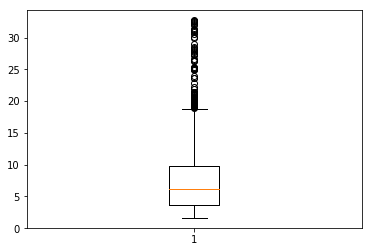

In [14]:
plt.boxplot(sample)
plt.show()

In [15]:
# calculate summary statistics
data_mean, data_std = sample.mean(), sample.std()
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in sample if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in sample if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Identified outliers: 44
Non-outlier observations: 2976


In [16]:
from numpy import percentile

q25, q75 = percentile(sample, 25), percentile(sample, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in sample if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in sample if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Percentiles: 25th=3.617, 75th=9.728, IQR=6.110
Identified outliers: 97
Non-outlier observations: 2923


In [17]:
print('Skewness: ', sample.skew())

Skewness:  1.56889940428


In [18]:
print('Five-number Summary: ')
print(sample.describe())

Five-number Summary: 
count    3020.000000
mean        7.307851
std         5.037851
min         1.620000
25%         3.617500
50%         6.120000
75%         9.727500
max        32.720000
Name: Adj Close, dtype: float64


Z-score is a standardized value and denote the number of standard deviations from the mean. 

In [19]:
from scipy import stats

print('Z-scores:')
stats.zscore(sample)

Z-scores:


array([ 2.42448046,  2.47808361,  2.4622012 , ...,  2.02146414,
        2.08697911,  2.21403844])

Coefficient of variation is a measure of relative variability computed by dividing the standard deviation by the mean and multiplying by 100. 

In [20]:
print('Coefficient of variation:')
stats.variation(sample)

Coefficient of variation:


0.68926102788890209

{'boxes': [<matplotlib.lines.Line2D at 0x1619a737898>],
 'caps': [<matplotlib.lines.Line2D at 0x1619a73c390>,
 'fliers': [<matplotlib.lines.Line2D at 0x1619a7410b8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1619a73cc18>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1619a7379e8>,
  <matplotlib.lines.Line2D at 0x1619a737ef0>]}

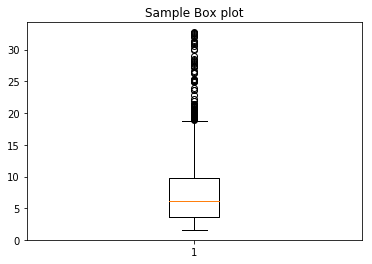

In [21]:
fig1, ax1 = plt.subplots()
ax1.set_title('Sample Box plot')
ax1.boxplot(sample)

{'boxes': [<matplotlib.lines.Line2D at 0x1619a77b6a0>],
 'caps': [<matplotlib.lines.Line2D at 0x1619a780160>,
 'fliers': [<matplotlib.lines.Line2D at 0x1619a780e80>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1619a780a20>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1619a77b7f0>,
  <matplotlib.lines.Line2D at 0x1619a77bcf8>]}

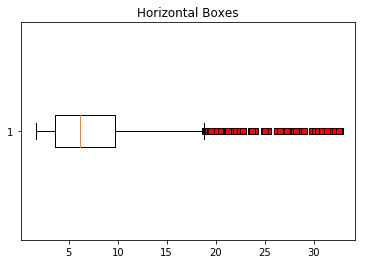

In [22]:
red_square = dict(markerfacecolor='r', marker='s')
fig5, ax5 = plt.subplots()
ax5.set_title('Horizontal Boxes')
ax5.boxplot(sample, vert=False, flierprops=red_square)

In [23]:
print('Empirical rule:')
final_list = [x for x in sample if (x > sample.mean() - 2 * sample.std())]
final_list = [x for x in final_list if (x < sample.mean() + 2 * sample.std())]
print(final_list)

Empirical rule:
[16.03, 16.05, 16.22, 15.95, 15.79, 15.55, 15.77, 15.69, 15.6, 15.32, 15.5, 15.13, 14.9, 14.69, 14.6, 14.95, 14.83, 14.94, 14.92, 14.56, 14.54, 14.69, 15.68, 15.08, 15.07, 14.79, 14.18, 13.95, 14.09, 14.1, 14.19, 14.2, 14.17, 13.94, 14.13, 13.93, 14.01, 13.72, 13.41, 13.6, 13.35, 13.5, 13.55, 13.5, 13.38, 13.08, 13.06, 12.83, 12.9, 12.71, 12.86, 13.35, 13.27, 13.19, 13.66, 13.57, 13.52, 13.47, 13.91, 14.28, 14.16, 14.04, 14.57, 14.65, 14.5, 14.32, 13.82, 13.54, 13.63, 13.69, 13.53, 13.28, 13.18, 13.57, 14.05, 14.68, 15.36, 15.4, 15.58, 15.43, 15.59, 15.43, 15.42, 15.21, 14.88, 14.76, 14.6, 14.37, 14.27, 14.31, 14.17, 13.98, 13.63, 13.68, 14.07, 13.91, 13.8, 13.96, 13.78, 13.63, 13.51, 13.57, 13.64, 14.72, 14.57, 14.28, 14.18, 14.58, 14.49, 14.3, 14.36, 14.36, 14.19, 14.39, 14.57, 14.43, 14.65, 15.36, 15.43, 15.72, 15.84, 15.46, 15.78, 15.5, 15.36, 15.21, 15.58, 14.73, 13.87, 13.79, 13.54, 13.41, 13.4, 12.85, 12.77, 12.63, 13.42, 13.08, 13.01, 12.84, 12.54, 11.95, 11.64,

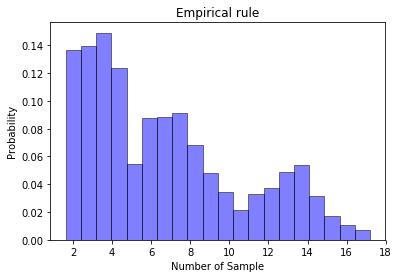

In [24]:
plt.hist(final_list, 20,
         density=True,
         histtype='bar',
         facecolor='b',
         edgecolor='k',
         alpha=0.5)
plt.title('Empirical rule')
plt.xlabel('Number of Sample')
plt.ylabel('Probability')
plt.show()

Mean:  7.307850993377494 
Median:  6.12 
Mode:  2.28


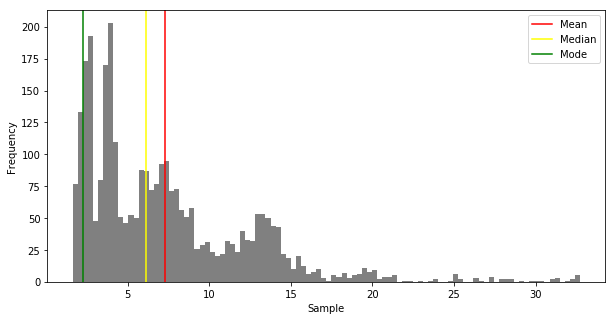

In [25]:
mean = sample.mean()
median = sample.median()
mode = sample.mode()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])
plt.figure(figsize=(10,5))
plt.hist(sample,bins=100,color='grey')
plt.axvline(mean,color='red',label='Mean')
plt.axvline(median,color='yellow',label='Median')
plt.axvline(mode[0],color='green',label='Mode')
plt.xlabel('Sample')
plt.ylabel('Frequency')
plt.legend()
plt.show()

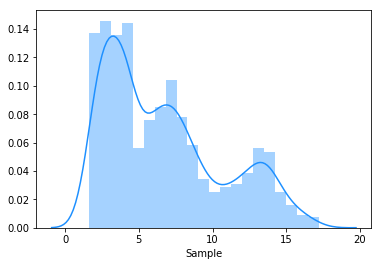

In [26]:
import seaborn as sns

sns.distplot(final_list , color="dodgerblue", axlabel='Sample')

In [27]:
#skewness
print('Skewness:', sample.skew())

Skewness: 1.56889940428


In [28]:
#kutosis
print('Kutosis:', sample.kurt())

Kutosis: 3.45949851138


C:\Users\Tin Hang\Anaconda3\envs\py35\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


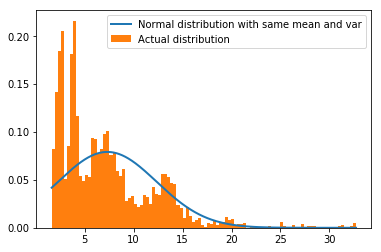

In [29]:
#convert pandas DataFrame object to numpy array and sort
h = np.asarray(sample)
h = sorted(h)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
plt.plot(h,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(h,normed=True,bins = 100,label="Actual distribution")      
plt.legend()
plt.show()

In [30]:
# Ordinary least squares
from statsmodels.formula.api import ols

mlr = ols("sample~Open+High+Low+Volume", dataset).fit()
print(mlr.summary())

                            OLS Regression Results                            
Dep. Variable:                 sample   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.502e+06
Date:                Fri, 09 Aug 2019   Prob (F-statistic):               0.00
Time:                        20:29:42   Log-Likelihood:                 2305.1
No. Observations:                3020   AIC:                            -4600.
Df Residuals:                    3015   BIC:                            -4570.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0054      0.004     -1.436      0.1

In [31]:
# One sample t-test
from scipy.stats import ttest_1samp

sample_mean = np.mean(sample)
print("Sample Mean:", sample_mean)
tset, pval = ttest_1samp(sample, 8)

print("p-values:",pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print("Rejecting null hypothesis")
else:
  print("Accepting null hypothesis")

Sample Mean: 7.307850993377494
p-values: 5.72226493771e-14
Rejecting null hypothesis


In [32]:
# Two sampled T-test
from scipy.stats import ttest_ind

low_mean = np.mean(dataset['Low'])
high_mean = np.mean(dataset['High'])
print("Low mean value:", low_mean)
print("High mean value:", high_mean)

low_std = np.std(dataset['Low'])
high_std = np.std(dataset['High'])
print("week1 std value:", low_std)
print("week2 std value:", high_std)

ttest,pval = ttest_ind(dataset['Low'],dataset['High'])
print("p-value:",pval)

if pval <0.05:
  print("Reject null hypothesis")
else:
  print("Accept null hypothesis")

Low mean value: 7.148288077152302
High mean value: 7.472039734437109
week1 std value: 4.91223413555167
week2 std value: 5.157058804236294
p-value: 0.0125284301319
Reject null hypothesis


In [33]:
# Paired sampled t-test

dataset[['Open','Close']].describe()
ttest,pval = stats.ttest_rel(dataset['Open'], dataset['Close'])
print('p-value:', pval)

if pval<0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

p-value: 0.0494388526567
Reject null hypothesis


In [34]:
# One-sample Z test
from scipy import stats
from statsmodels.stats import weightstats as stests

ztest ,pval = stests.ztest(sample, x2=None, value=156)
print('p-value:',pval)

if pval<0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

p-value: 0.0
Reject null hypothesis


In [35]:
# Two-sample Z test
test ,pval1 = stests.ztest(dataset['High'], x2=dataset['Low'], value=0,alternative='two-sided')

print('p-value:',pval)

if pval<0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

p-value: 0.0
Reject null hypothesis


In [36]:
# One Way F-test(Anova)
F, p = stats.f_oneway(dataset['Low'], dataset['High'], dataset['Volume'])

print("p-value for significance is: ", p)

if p<0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

p-value for significance is:  0.0
Reject null hypothesis


Text(0,0.5,'frequency of occurence')

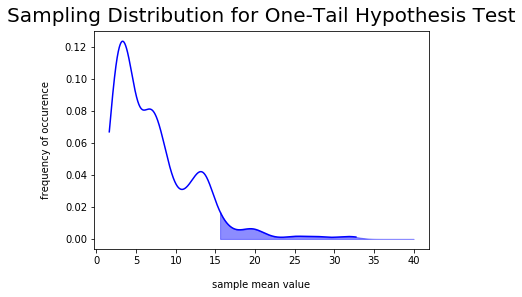

In [37]:
values = sample
two_std_from_mean = np.mean(values) + np.std(values)*1.645
kde = stats.gaussian_kde(values)
pos = np.linspace(np.min(values), np.max(values), 10000)
plt.plot(pos, kde(pos), color='blue')
shade = np.linspace(two_std_from_mean, 40, 300)
plt.fill_between(shade, kde(shade), alpha=0.45, color='blue')
plt.title("Sampling Distribution for One-Tail Hypothesis Test", y=1.015, fontsize=20)
plt.xlabel("sample mean value", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14)

In [38]:
symbol1 = '^GSPC' 
symbol2 = 'AMD'

data1 = yf.download(symbol1,start,end)
data2 = yf.download(symbol2,start,end)

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


In [39]:
# Student's t-test for independent samples
from scipy.stats import ttest_ind

# generate two independent samples
data1 = data1['Adj Close']
data2 = data2['Adj Close']
# compare samples
stat, p = ttest_ind(data1, data2)
print('t=%.3f, p=%.3f' % (stat, p))

t=170.409, p=0.000


In [40]:
# calculate sample standard deviations
std1, std2 = np.std(data1, ddof=1), np.std(data2, ddof=1)

In [41]:
# calculate standard errors
n1, n2 = len(data1), len(data2)
se1, se2 = std1/math.sqrt(n1), std2/math.sqrt(n2)

In [42]:
# calculate standard errors
se1, se2 = stats.sem(data1), stats.sem(data2)

In [43]:
# standard error on the difference between the samples
sed = math.sqrt(se1**2.0 + se2**2.0)

In [44]:
# calculate the t statistic
t_stat = (data1.mean() - data2.mean()) / sed

In [45]:
# degrees of freedom
df = n1 + n2 - 2

In [46]:
from scipy.stats import t
# calculate the critical value
alpha = 0.05
cv = t.ppf(1.0 - alpha, df)

In [47]:
# calculate the p-value
p = (1 - t.cdf(abs(t_stat), df)) * 2

In [48]:
# function for calculating the t-test for two independent samples
def independent_ttest(data1, data2, alpha):
	# calculate means
	mean1, mean2 = mean(data1), mean(data2)
	# calculate standard errors
	se1, se2 = sem(data1), sem(data2)
	# standard error on the difference between the samples
	sed = sqrt(se1**2.0 + se2**2.0)
	# calculate the t statistic
	t_stat = (mean1 - mean2) / sed
	# degrees of freedom
	df = len(data1) + len(data2) - 2
	# calculate the critical value
	cv = t.ppf(1.0 - alpha, df)
	# calculate the p-value
	p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
	# return everything
	return t_stat, df, cv, p

In [49]:
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

Reject the null hypothesis that the means are equal.


In [50]:
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

Reject the null hypothesis that the means are equal.


In [51]:
# function for calculating the t-test for two dependent samples
def dependent_ttest(data1, data2, alpha):
	# calculate means
	mean1, mean2 = np.mean(data1), np.mean(data2)
	# number of paired samples
	n = len(data1)
	# sum squared difference between observations
	d1 = sum([(data1[i]-data2[i])**2 for i in range(n)])
	# sum difference between observations
	d2 = sum([data1[i]-data2[i] for i in range(n)])
	# standard deviation of the difference between means
	sd = math.sqrt((d1 - (d2**2 / n)) / (n - 1))
	# standard error of the difference between the means
	sed = sd / math.sqrt(n)
	# calculate the t statistic
	t_stat = (mean1 - mean2) / sed
	# degrees of freedom
	df = n - 1
	# calculate the critical value
	cv = t.ppf(1.0 - alpha, df)
	# calculate the p-value
	p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
	# return everything
	return t_stat, df, cv, p

In [52]:
from scipy.stats import ttest_rel

# compare samples
stat, p = ttest_rel(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=171.091, p=0.000


In [53]:
# calculate the t test
alpha = 0.05
t_stat, df, cv, p = dependent_ttest(data1, data2, alpha)
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

t=171.091, df=3019, cv=1.645, p=0.000
Reject the null hypothesis that the means are equal.
Reject the null hypothesis that the means are equal.
